In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Spotify -Raw Data.csv", encoding="ISO-8859-1")
df_cleaned=df.dropna()
df_cleaned=df_cleaned.drop_duplicates()

df["streams"] = pd.to_numeric(df["streams"], errors="coerce")
df["in_spotify_playlists"] = pd.to_numeric(df["in_spotify_playlists"], errors="coerce")

# Summary statistics
print(df[["streams", "bpm", "danceability_%", "energy_%","valence_%","in_spotify_playlists"]].describe())

# Check for missing values
print(df.isnull().sum())

numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])


def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

df_no_outliers = remove_outliers_iqr(df_cleaned, numerical_cols)


            streams         bpm  danceability_%    energy_%   valence_%  \
count  9.520000e+02  953.000000       953.00000  953.000000  953.000000   
mean   5.141374e+08  122.540399        66.96957   64.279119   51.431270   
std    5.668569e+08   28.057802        14.63061   16.550526   23.480632   
min    2.762000e+03   65.000000        23.00000    9.000000    4.000000   
25%    1.416362e+08  100.000000        57.00000   53.000000   32.000000   
50%    2.905309e+08  121.000000        69.00000   66.000000   51.000000   
75%    6.738690e+08  140.000000        78.00000   77.000000   70.000000   
max    3.703895e+09  206.000000        96.00000   97.000000   97.000000   

       in_spotify_playlists  
count            953.000000  
mean            5200.124869  
std             7897.608990  
min               31.000000  
25%              875.000000  
50%             2224.000000  
75%             5542.000000  
max            52898.000000  
track_name               0
artist(s)_name           0


In [ ]:
# After an initial analysis of the dataset, we decided to further explore the relationship between streams and key musical features such as BPM, energy, and danceability.
# By comparing these attributes, we aim to identify patterns that influence a song's popularity.


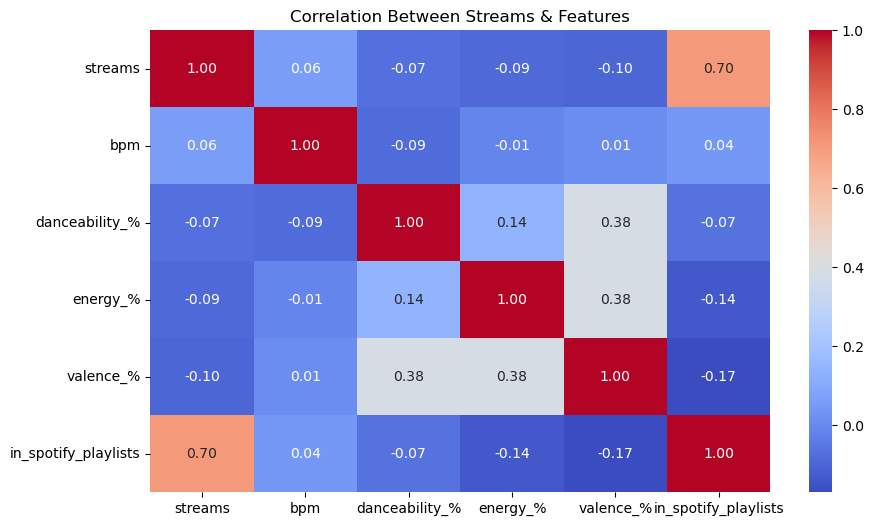

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_no_outliers[["streams", "bpm", "danceability_%", "energy_%", "valence_%","in_spotify_playlists"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Streams & Features")
plt.show()


In [ ]:
#The heatmap shows how different features relate to song streams.
#Positive correlations:Songs in more playlists → More streams (strong relationship).
#Weaker correlations:Danceability has little impact on streams.
                    #BPM (Tempo) have moderate influence

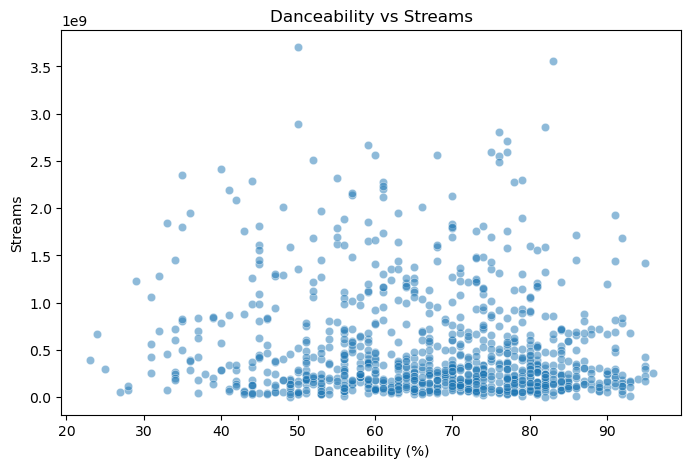

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["danceability_%"], y=df["streams"], alpha=0.5)
plt.title("Danceability vs Streams")
plt.xlabel("Danceability (%)")
plt.ylabel("Streams")
plt.show()


In [ ]:
# Key Observations from the Scatter Plot 🔍
# No strong upward trend → Indicates that danceability alone doesn’t guarantee high streams.
# Some high-stream songs have moderate danceability, suggesting other factors contribute to popularity (e.g., playlist inclusion, artist influence).
# Diverse distribution → Danceable songs appear across various stream counts, meaning viral songs aren’t necessarily the most danceable.


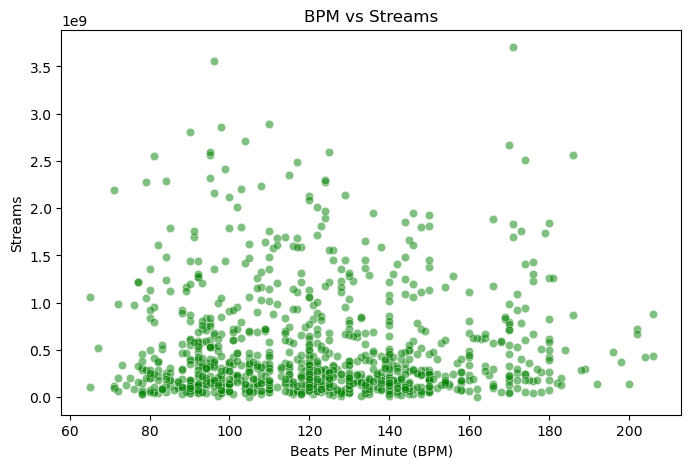

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["bpm"], y=df["streams"], alpha=0.5, color="green")
plt.title("BPM vs Streams")
plt.xlabel("Beats Per Minute (BPM)")
plt.ylabel("Streams")
plt.show()


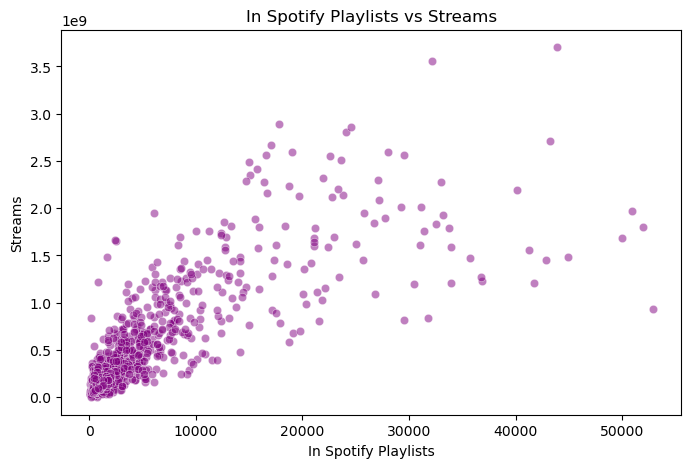

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["in_spotify_playlists"], y=df["streams"], alpha=0.5, color="purple")
plt.title("In Spotify Playlists vs Streams")
plt.xlabel("In Spotify Playlists")
plt.ylabel("Streams")
plt.show()

In [ ]:
# Key Observations from the Scatter Plot 🔍
# Positive correlation → Songs in more playlists tend to have higher streams.
# Some extreme outliers → A few songs with low playlist counts but high streams (possibly viral hits).
# Densely clustered at low playlist numbers → Most songs appear in fewer playlists and have lower streams.
# Stronger impact compared to BPM or Danceability → Suggests playlist inclusion is a major driver of popularity.